In [1]:
import random
from itertools import combinations

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

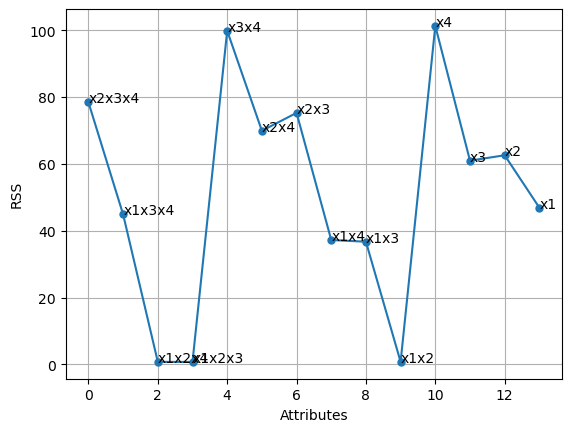

In [2]:
data = pd.read_csv('datasets/reglab2.txt', sep='\t')
X = data.loc[:, 'x1':'x4']
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))
sign_dependence = {'rss': [], 'labels': [], 'iter': []}
iterator = 0
for i in range(3):
    for comb in combinations(['x1', 'x2', 'x3', 'x4'], i + 1):
        X_reduced = X.copy()
        name = 'x1x2x3x4'
        for sign in comb:
            del X_reduced[sign]
            name = name.replace(sign, '')
        X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=random.randint(0, 1000))
        lmr = Ridge().fit(X_train, y_train)
        y_pred = lmr.predict(X_test)
        sign_dependence['rss'].append(mean_squared_error(y_pred, y_test) * len(y_test))
        sign_dependence['labels'].append(name)
        sign_dependence['iter'].append(iterator)
        iterator += 1
plt.plot(sign_dependence['iter'], sign_dependence['rss'], label='test', marker='.', markersize=10)
plt.xlabel('Attributes')
plt.ylabel('RSS')
for label, x, y in zip(sign_dependence["labels"], sign_dependence['iter'], sign_dependence["rss"]):
    plt.annotate(label, xy=(x, y))
plt.grid()
plt.show()